# ASSIGNMENT 5

## Importing essential python libraries

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import scipy

## Creating a Pandas Dataframe and reading a csv file into it

In [3]:
df = pd.read_csv(r"C:\Users\omkar\Downloads\datafile.csv")
df.drop(df.tail(1).index,inplace=True) # drop last row

## Basic Data Cleaning

In [4]:
df = df.replace(np.nan, 0)                  # Replacing nan values by 0

df['Number of census houses'] = pd.to_numeric(df.replace({'Number of census houses' : {'zero' : 0}})['Number of census houses'])        #column 'Number of census houses' has an entry of string zero which is replaced with number 0 and datatype of column is changed to float64

df = df.round(0)    #Rounding off the 'float64' values in all columns

## New Dataframe with columns which are required for further processing

In [5]:
df_new = pd.DataFrame()                             #creating a new dataframe

df_new['District'] = df['District']                                                         # Copying required columns to the new dataframe
df_new['Type of residence namely rural or urban'] = df['Type of residence namely rural or urban']

df_new['Percent of Houses having mud or unburnt brick as material of wall'] = df['Houses having mud or unburnt brick as material of wall']*100/df['Number of census houses']

df_new['Percent of Houses having mud or unburnt brick as material of wall'] = df_new['Percent of Houses having mud or unburnt brick as material of wall'].fillna(0)         #replacing nan values with 0

## Dataframe with percent of mud houses in Rural and Urban areas of Districts

In [6]:
mud_houses = df['Houses having mud or unburnt brick as material of wall']/df['Number of census houses']

### Q-Q Plot of distribution of mud houses against Normal and Uniform Distribution

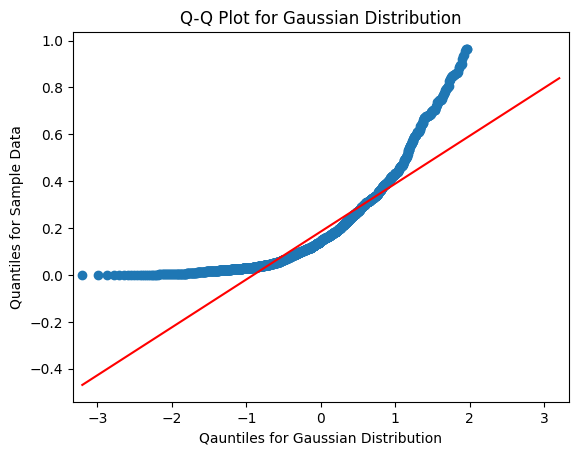

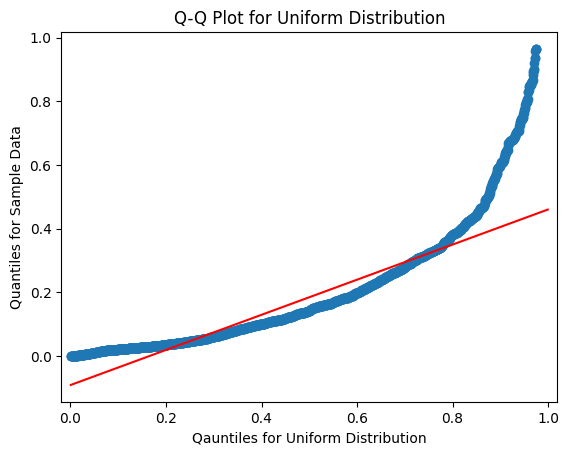

In [7]:
import scipy.stats as stats                                     # Importing required libraries and modules
import statsmodels.api as sm

guassian_qqplot = sm.qqplot(mud_houses, line="q")               #Q-Q plot of data against standard gaussian

plt.title('Q-Q Plot for Gaussian Distribution')                  # Giving titles, xlabels, ylabels for the Q-Q plot
plt.xlabel('Qauntiles for Gaussian Distribution')
plt.ylabel('Quantiles for Sample Data')

uniform_qqplot = sm.qqplot(mud_houses, dist=stats.uniform, line="q")            #Q-Q plot of data against Uniform distribution

plt.title('Q-Q Plot for Uniform Distribution')                                  # Giving titles, xlabels, ylabels for the Q-Q plot
plt.xlabel('Qauntiles for Uniform Distribution')
plt.ylabel('Quantiles for Sample Data')

plt.show()                                      # Displaying the plot on screen

## Mean and Standard Deviation of the Gaussian Distribution (MLE Parameters)

In [8]:
gaussian_mean = np.mean(mud_houses)

gaussian_SD = np.std(mud_houses)

print('Mean = ', gaussian_mean)
print('Standard Deviation = ', gaussian_SD)

Mean =  0.20962969055268005
Standard Deviation =  0.20990877898510868


## Start and End point for Uniform Distribution(MLE Parameters)

In [9]:
uniform_start = np.min(mud_houses)

uniform_end = np.max(mud_houses)

print('Uniform distribution a = ', uniform_start)
print('Uniform distribution b = ', uniform_end)

Uniform distribution a =  0.0
Uniform distribution b =  0.9646127784063561


### As Gaussian distribution with the above calculated MLE parameters has more probability density than the uniform distribution with the above calculated MLE parameters for the Data samples, gaussian distribution is a better explainer(fit) of the observed data.

## Inverse CDF of IQ Function

In [10]:
def Inverse_CDF(x):                                     #Defining A function that finds the value of inverse function of CDF at the given x
    if x <= 0.5:                                        # for all sample x less than or equal to 0.5
        value = -1 + (2*x)**0.5                         
    else:                                               # for all sample x greater than 0.5
        value = 1 - (2*(1-x))**0.5
    return value

## Finding Theoretical Quantiles for Q-Q Plot

In [11]:
N = 1472                                    # No of rows in dataframe
Y = []                                      # All values of y for which we will calculate corresponding x using Inverse Function
for i in range(0,N):
    Y.append(i/N)
x_theoretical = []                          # A list which will hold values of X-theoretical given by the inverse of CDF
for i in range(0, N):
    x_theoretical.append(Inverse_CDF(Y[i]))

## Plotting the Q-Q Plot

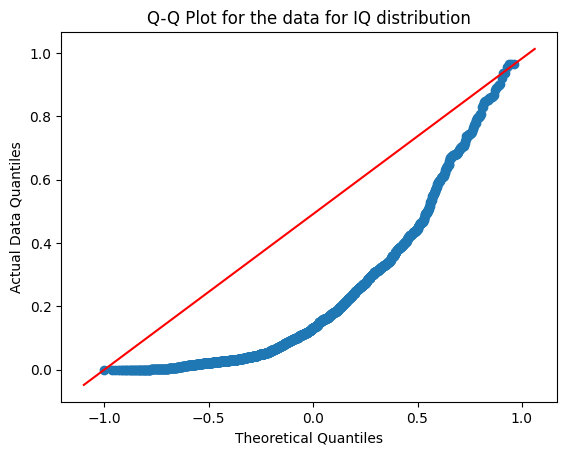

In [20]:
mud_houses = mud_houses.fillna(0)                       # Replacing Nan values by 0 in the mud_houses DataFrame
x_actual = mud_houses.to_list()                         # Copying the data from the Dataframe to a list to be plotted using a scatterplot.
x_actual.sort()                                         # Sorting the list
plt.scatter(x_theoretical, x_actual)                          #Scatter plot of acual Quantiles vs theoretical Quantiles
plt.title('Q-Q Plot for the data for IQ distribution')                                  # Giving titles, xlabels, ylabels for the Q-Q plot
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Actual Data Quantiles')

x_limit = plt.xlim()
y_limit = plt.ylim()
plt.plot(x_limit, y_limit, color='r')
plt.show()

## Q-3 a) Independent T-Test

### Reason for selecting Independent T-Test is that We want to check if the percent of houses across districts with “mud or unburnt brick” is really larger for rural versus urban in the housing data. Rural and Urban are the two Categorical Binary Predictors whereas the corresponding percentages are the Numerical Outcomes.Thus Independent T-Test was selected by me for the testing as it best fits the above elaborated parameters.

## Test for Finding the difference between the urban and rural mud houses

In [21]:
df_Urban = pd.DataFrame()                           # Creating 2 dataframes for urban and rural data
df_Rural = pd.DataFrame()

df_Urban = df_new[df_new['Type of residence namely rural or urban'] == 'Urban']         # Distributing the original data based on 'Type of residence namely rural or urban'
df_Rural = df_new[df_new['Type of residence namely rural or urban'] == 'Rural']

Urban_percents = df_Urban['Percent of Houses having mud or unburnt brick as material of wall']/100         # Making lists which will have 'Percent of Houses having mud or unburnt brick as material of wall' for testing
Rural_percents = df_Rural['Percent of Houses having mud or unburnt brick as material of wall']/100
 
scipy.stats.ttest_ind(Urban_percents, Rural_percents)                 # Doing the Independent t-test on the urban and rural data

Ttest_indResult(statistic=-14.925387910300449, pvalue=5.199088779562584e-47)

### Thus this independent T-Test gives the 'statistic' value which is far away from the 'pvalue' suggesting that the percent of houses across districts with “mud or unburnt brick” is really larger for rural versus urban in the housing data.

## Q-3 b) Spearman Correlation Test

### Reason for selecting Spearman's Correlation test is that we want to check if either rural or urban percent of houses with “mud or unburnt brick” for the same district can be predicted using the other in the housing data. Here the percent of houses in both Rural or Urban regions are the numerical Predictors whereas the Outcome i.e the percent of Houses in other area is also Numerical. Spearman Correlation was chosen by me over Pearson because the change in the outcome is not proportional but varies monotonically with Predictor.

## Spearman Correlation Test for predicting Urban and Rural data if other is known

In [14]:
stats.spearmanr(Urban_percents, Rural_percents)

SpearmanrResult(correlation=0.6657141297375397, pvalue=2.1067054454474085e-95)

### The 'Correlation' is higher than the 'pvalue' which suggests that we can somewhat predict the percent of houses with 'mud or unburnt brick' in Urban(or Rural) area if we know the percent in Urban(or Rural) area. This is also Intuitively Obvious as the District with more number of houses with mud and Unburnt bricks in one area (Urban or Rural) is likely to have more number of houses in the other area too as the construction technology and money are not easily available in that District

## 

## Reading and Cleaning Automobile Data in a Dataframe

In [15]:
df_auto = pd.read_csv(r"C:\Users\omkar\Downloads\Automobile_data.csv")          

df_auto = df_auto.replace(to_replace='4wd', value='fwd')        # replacing the wrong entry '4wd' by the correct entry '4wd'

## Creating a new Dataframe which will be used for testing

In [16]:
df_auto_new = pd.DataFrame()                    # Creating a new Dataframe

df_auto_new['body-style'] = df_auto['body-style']           # Copying the required items from original Dataframe to the new one for testing
df_auto_new['drive-wheels'] = df_auto['drive-wheels']

## Grouping for clear visualization of data

In [22]:
df_ = df_auto_new.groupby(['body-style']).value_counts()          # Grouping the data based on body-style and counting the number of those two drive-wheel type for every body-type for clear understanding of the reader
print(df_)

body-style   drive-wheels
convertible  rwd              5
             fwd              1
hardtop      rwd              7
             fwd              1
hatchback    fwd             51
             rwd             19
sedan        fwd             60
             rwd             36
wagon        fwd             16
             rwd              9
dtype: int64


## Q-3 c) Chi-Square Test

### Performing Chi-square test to find the relation between 'body-style' and 'drive-wheels'

In [18]:
sample = df_.to_list()                              # Converting the dataframe into a list
fwd = []                                            # Defining two lists to contain the number of vehicles of every 'body-type' which have that 'wheel-type'
rwd = []
for i in range(0,10):
    if i%2 == 0:
        rwd.append(sample[i])                       # Adding elements of list 'sample' into proper categories
    else:
        fwd.append(sample[i])

table = [rwd, fwd]                                  # Making an array of two list to perform the chi-square test

from scipy.stats import chi2_contingency            # Importing function from stats module

statistic, pvalue, dof, expected_values = chi2_contingency(table)       # Computing the statistic, pvalue, degree of freedom, expected value using the chi-square test

print('rwd =', expected_values[0])                          # Printing all the results

print('fwd =', expected_values[1])

print('statistic = ', statistic,',', 'pvalue', pvalue) 

rwd = [ 4.06829268  5.42439024 47.46341463 65.09268293 16.95121951]
fwd = [ 1.93170732  2.57560976 22.53658537 30.90731707  8.04878049]
statistic =  4.306160915423505 , pvalue 0.3661542597511486


### We can clearly see from the expected value results of chi-square test that no matter what the 'body-type' of the car is,'wheel-type' being 'rwd' is more than twice as likely as the 'wheel-type' being 'fwd'. The likelihood of 'wheel-type' being 'rwd' over 'fwd' decreases in the order = Hardtop > Converible > Hatchback > Wagon > Sedan

### This suggests that as the 'Ground clearance' and the 'sturdiness' of cars reduces the necessity of wheel-type being 'rwd' decreases. This means if the car is a sedan made for roads it doesn't have the necessity for 'rwd' wheels like the Hardtops do. But still 'rwd' wheels are the preferred choice over 'fwd' wheels. Also notice 'statistic' is much larger than the 'pvalue'.